<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-ams182/blob/main/Reto%20pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

In [2]:
import requests, zipfile
from io import BytesIO
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from sklearn.cluster import KMeans

# activate plot theme
import qeds
qeds.themes.mpl_style();
%matplotlib inline
pd.set_option("display.max_columns",None)

Cargando la base


In [3]:
# online

url = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'
req = requests.get(url)
zipfile.ZipFile(BytesIO(req.content)).extractall('unzipped_zip/')
df_sub=pd.read_csv('unzipped_zip/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding = 'latin1')

#local

#ubicación = 'C:/Users/AMUNGUIA/Desktop/pia/actividades/bases/agua.csv'
#df_sub=pd.read_csv(ubicacion, encoding = 'latin1')

df_sub.drop('SDT_mg/L', axis=1, inplace=True)
df_sub.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [4]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_M_mg/L            1066 non-null   object 
 15  CALIDAD_SDT_ra       

In [5]:
df_sub.isnull().any()

CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
PERIODO                 False
ALC_mg/L                 True
CALIDAD_ALC              True
CONDUCT_mS/cm            True
CALIDAD_CONDUC           True
SDT_M_mg/L               True
CALIDAD_SDT_ra           True
CALIDAD_SDT_salin        True
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                 True
CALIDAD_DUR              True
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L               True
CALIDAD_N_NO3            True
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG              False
PB_TOT_mg/

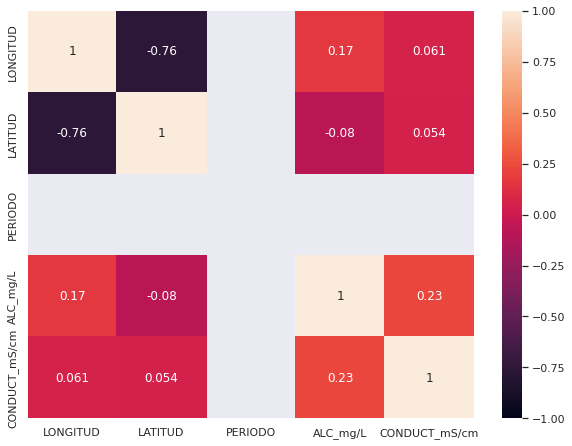

In [6]:
df_sub.corr()

sns.set(rc = {'figure.figsize':(10,7.5)})
sns.heatmap(df_sub.corr(), vmin = -1, vmax = 1,  annot= True)

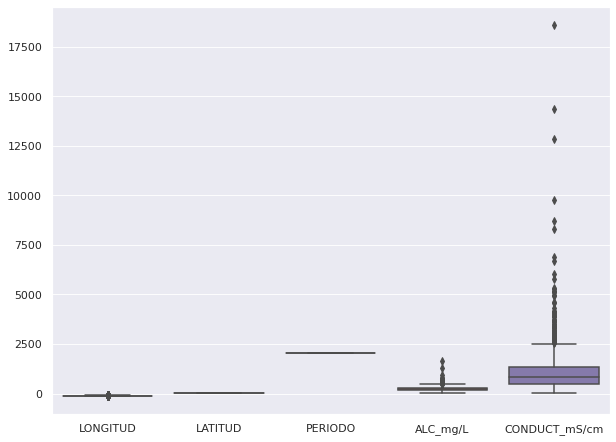

In [7]:
sns.set(rc = {'figure.figsize':(10,7.5)})
sns.boxplot( data=df_sub)

# According to series skew method the data is highly skewed so is better to use median than mean


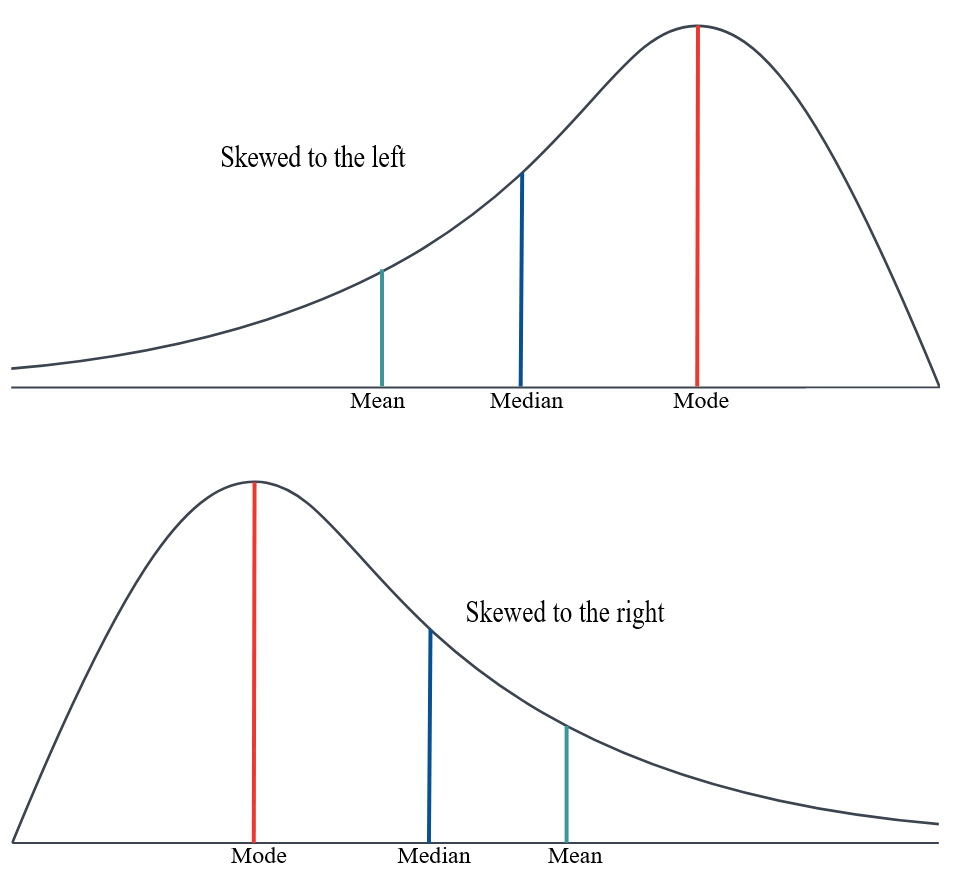

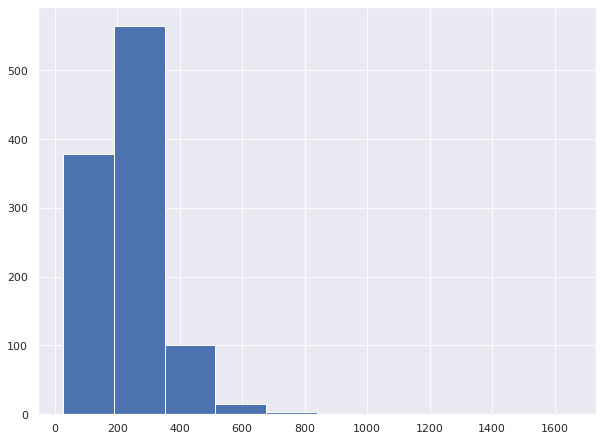

In [8]:
(df_sub['ALC_mg/L']).hist()

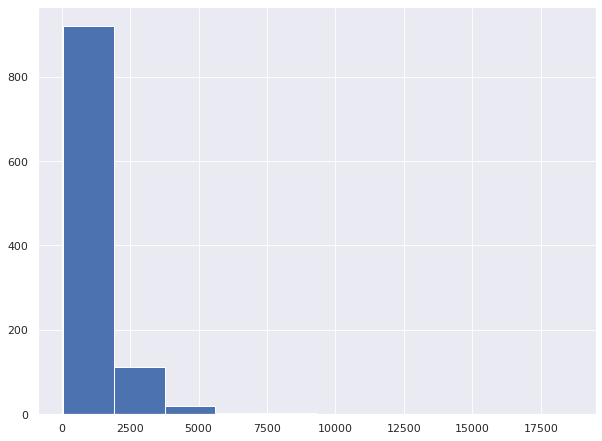

In [9]:
(df_sub['CONDUCT_mS/cm']).hist()

In [10]:
# Columnas relacionadas con la calidad del agua
print('COLUMNAS NUMERICAS\n')

columnas_n = ['ALC_mg/L','CONDUCT_mS/cm']

for columna in columnas_n:
  s = df_sub[columna].skew()
  if s < 3:
    df_sub[columna].fillna(df_sub[columna].mean(),inplace = True)
    print('para: ' + columna + ' con sesgo: ' + str(s) + ' se usó la media.')
  elif ((s > 3) & (s <9.99)):
    df_sub[columna].fillna(df_sub[columna].median(),inplace = True)
    print('para: ' + columna + ' con sesgo: ' + str(s) + 'se usó la mediana')
  elif (s > 10):
    df_sub[columna].fillna(df_sub[columna].mode(),inplace = True)
    print('para: ' + columna + ' con sesgo: ' + str(s) + 'se usó la moda')

columnas_c = ['CALIDAD_ALC', 'CALIDAD_CONDUC', 
              'SDT_M_mg/L','CALIDAD_SDT_ra', 'CALIDAD_SDT_salin','DUR_mg/L',
              'CALIDAD_DUR','N_NO3_mg/L','CALIDAD_N_NO3','CONTAMINANTES']

print('\n\n')
print('COLUMNAS CATEGORICAS\n')
for columna in columnas_c:
  df_sub[columna].fillna(df_sub[columna].mode()[0], inplace = True)   
  print('Hay Nan en ' + columna + '  ' + str(df_sub[columna].isnull().any())) 

COLUMNAS NUMERICAS

para: ALC_mg/L con sesgo: 3.2912871304696463se usó la mediana
para: CONDUCT_mS/cm con sesgo: 6.001355928959924se usó la mediana



COLUMNAS CATEGORICAS

Hay Nan en CALIDAD_ALC  False
Hay Nan en CALIDAD_CONDUC  False
Hay Nan en SDT_M_mg/L  False
Hay Nan en CALIDAD_SDT_ra  False
Hay Nan en CALIDAD_SDT_salin  False
Hay Nan en DUR_mg/L  False
Hay Nan en CALIDAD_DUR  False
Hay Nan en N_NO3_mg/L  False
Hay Nan en CALIDAD_N_NO3  False
Hay Nan en CONTAMINANTES  False


In [11]:
df_sub.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm
count,1068.000000,1068.000000,1068.0,1068.000000,1068.000000
mean,-101.891007,23.163618,2020.0,235.558455,1137.133052
std,6.703263,3.887670,0.0,116.661485,1242.292889
min,-116.664250,14.561150,2020.0,26.640000,50.400000
25%,-105.388865,20.212055,2020.0,164.048750,505.500000
50%,-102.174180,22.617190,2020.0,215.527500,815.000000
75%,-98.974716,25.510285,2020.0,292.423750,1321.250000
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000


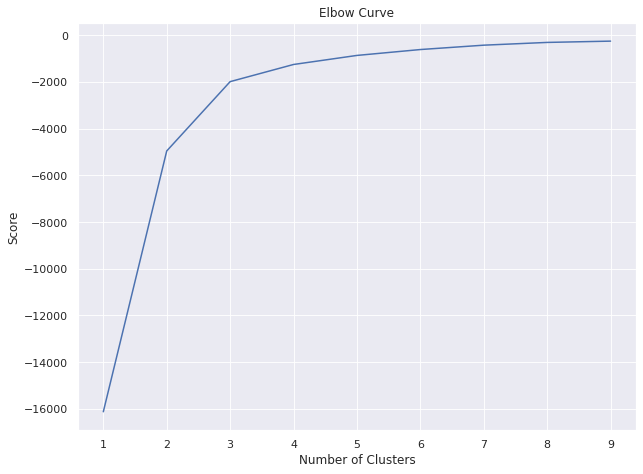

In [12]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_sub[['LATITUD']]
X_axis = df_sub[['LONGITUD']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [13]:
X = df_sub[["LONGITUD","LATITUD"]]


kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

C_DF = pd.DataFrame(C)
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1]))
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point)

# do clustering
kmeans.fit(X)
# save results
labels = kmeans.labels_


gdf_C = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
gdf_C

,0,1,Coordinates
0,-110.794488,28.438202,POINT (-110.79449 28.43820)
1,-101.722127,22.254226,POINT (-101.72213 22.25423)
2,-90.728470,19.473362,POINT (-90.72847 19.47336)


In [14]:
# send back into dataframe and display it
df_sub['CLUSTER'] = labels
# display the number of mamber each clustering
_clusters = df_sub.groupby('CLUSTER')['CLUSTER'].count()
print(_clusters)
df_sub['SEMAFORO'].value_counts()

CLUSTER
0    180
1    650
2    238
Name: CLUSTER, dtype: int64


Verde       434
Rojo        387
Amarillo    247
Name: SEMAFORO, dtype: int64

In [15]:
df_sub["CORDENADAS"] = list(zip(df_sub.LONGITUD, df_sub.LATITUD))
df_sub["CORDENADAS"] = df_sub["CORDENADAS"].apply(Point)
gdf = gpd.GeoDataFrame(df_sub, geometry="CORDENADAS")
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
# send back into dataframe and display it
gdf['cluster'] = labels
# display the number of mamber each clustering
_clusters = gdf.groupby('cluster').count()

print(world.head())

print(_clusters)

          pop_est      continent                      name  gdp_md_est  \
iso_a3                                                                   
FJI        920938        Oceania                      Fiji      8374.0   
TZA      53950935         Africa                  Tanzania    150600.0   
ESH        603253         Africa                 W. Sahara       906.5   
CAN      35623680  North America                    Canada   1674000.0   
USA     326625791  North America  United States of America  18560000.0   

                                                 geometry  
iso_a3                                                     
FJI     MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
TZA     POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
ESH     POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
CAN     MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
USA     MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
         CLAVE  SITIO  ORGANISMO_DE_CUENCA  ESTADO  MUNICIPIO

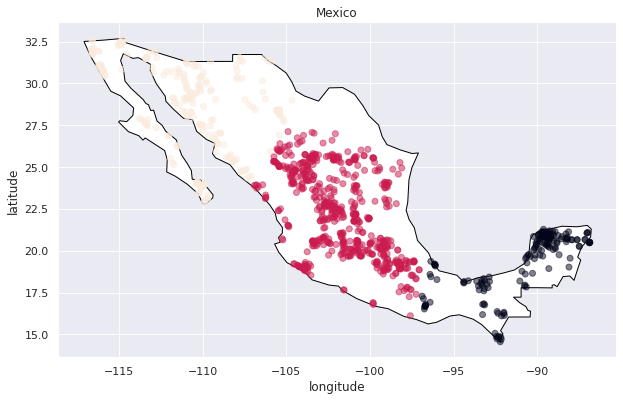

In [16]:
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, column="cluster", alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [17]:
df_sub['SEMAPHORE'] = df_sub['SEMAFORO'].replace(to_replace = "Verde", value = "green")
df_sub['SEMAPHORE'].replace(to_replace = "Rojo", value = "red", inplace=True)
df_sub['SEMAPHORE'].replace(to_replace = "Amarillo", value = "yellow", inplace=True)

#Sacar la moda de cada cluster y aplicarsela a sus vecinos cercanos
for val, cnt in df_sub.CLUSTER.value_counts().iteritems():
    print('Cluster', val, 'was found', cnt, 'times')
    mode = df_sub.loc[df_sub['CLUSTER']== val, 'SEMAPHORE'].mode()[0]
    print("The mode is", mode)
    df_sub.loc[df_sub['CLUSTER']== val, 'SEMAPHORE'] = mode

df_sub.head()

Cluster 1 was found 650 times
The mode is red
Cluster 2 was found 238 times
The mode is green
Cluster 0 was found 180 times
The mode is yellow


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,CLUSTER,CORDENADAS,cluster,SEMAPHORE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,"FLUO,",SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,1,POINT (-102.02210 22.20887),1,red
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,"FLUO,",SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,1,POINT (-102.20075 21.99958),1,red
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,1,POINT (-102.28801 22.36685),1,red
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,"FLUO,",SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,1,POINT (-102.29449 22.18435),1,red
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI,2,POINT (-110.24480 23.45138),2,green


In [18]:
df_sub['LATITUDYLONGITUD'] = df_sub['LATITUD']+df_sub['LONGITUD']
semaforo_dict = dict(zip(df_sub.LATITUDYLONGITUD, df_sub.SEMAPHORE))
semaforo_dict

{-79.81322999999999: 'red',
 -80.20116999999999: 'red',
 -79.92116: 'red',
 -80.11014: 'red',
 -86.79342: 'green',
 -86.75574: 'green',
 -86.73936: 'green',
 -87.016806: 'green',
 -86.288917: 'green',
 -86.22999999999999: 'green',
 -85.960771: 'green',
 -86.300906: 'green',
 -85.98518000000001: 'green',
 -86.25556: 'green',
 -86.36964: 'green',
 -86.5846: 'green',
 -86.5637: 'green',
 -86.41751000000001: 'green',
 -85.995007: 'green',
 -85.25779999999999: 'green',
 -85.26289: 'green',
 -85.24718: 'green',
 -85.11466999999999: 'green',
 -85.19658: 'green',
 -85.426854: 'green',
 -85.87440000000001: 'green',
 -85.85692: 'green',
 -85.721: 'green',
 -85.81829: 'green',
 -85.8357: 'green',
 -85.81332: 'green',
 -85.8279: 'green',
 -85.43339999999999: 'green',
 -86.995062: 'green',
 -86.15603: 'green',
 -86.25354: 'green',
 -86.25237: 'green',
 -86.22765000000001: 'green',
 -86.26042000000001: 'green',
 -86.27327: 'green',
 -86.29814999999999: 'green',
 -86.3178: 'green',
 -86.358417: 'gree